In [1]:
print("Trabajo Practico N°3: Ojos")
#Para mostrar las imagenes en ventanas emergentes saca el inline
%matplotlib inline

#Agregamos numpy para usar OpenCV
import numpy as np
#Agregamos cv2 para acceder a OpenCV
import cv2 as cv
#Agregamos para ver los graficos
import matplotlib.pyplot as plt

Trabajo Practico N°3: Ojos


In [37]:
def plot_fig(img, fsize = (8, 8)):
    fig = plt.figure(figsize = fsize, dpi = 130)
    if len(img) == 1:
        img1=plt.subplot(111)
        img1.imshow(img[0], cmap='gray')
    if len(img) == 2:
        img1=plt.subplot(121)
        img1.imshow(img[0], cmap='gray')
        img2=plt.subplot(122)
        img2.imshow(img[1], cmap='gray')

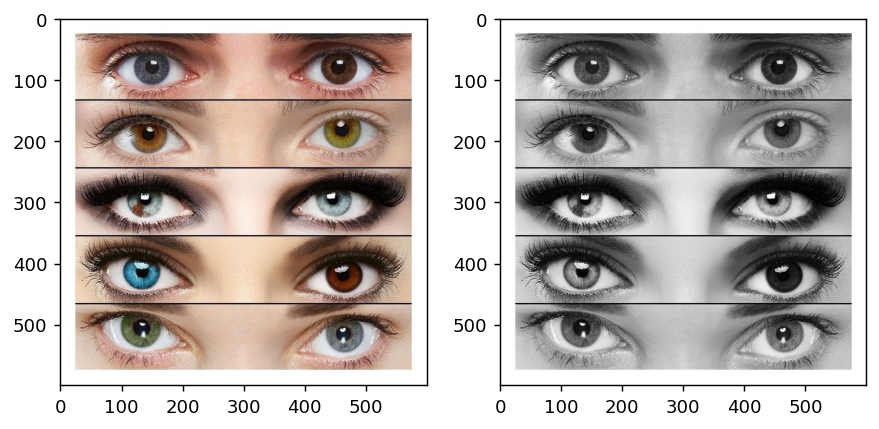

In [102]:
#Cargar imagen
img = cv.imread('eyes.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY) Por que no RGB a GRAY si esta en RGB ya
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plot_fig([img, img_gray])

In [103]:
#Suavizado de la imagen
blur_gray = cv.medianBlur(img_gray, 9)

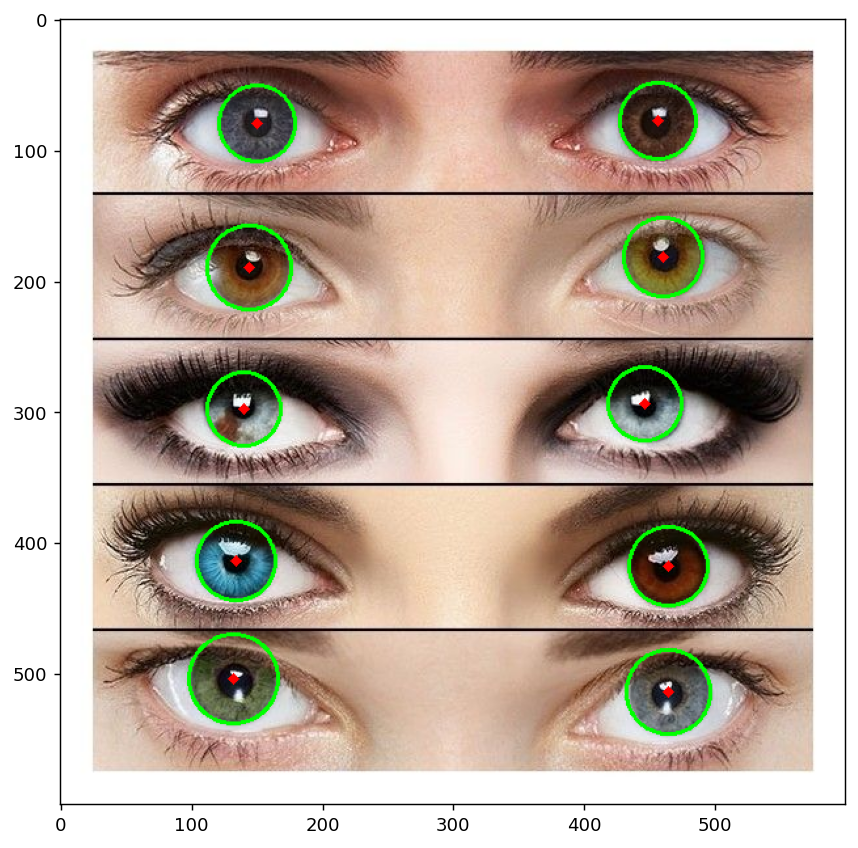

In [107]:
#Obtenemos circulos por medio de Hough
img_bis = img.copy()
circles = cv.HoughCircles(blur_gray,cv.HOUGH_GRADIENT,1,minDist=50,param1=40,param2=30,minRadius=24,maxRadius=40)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(img_bis,(i[0],i[1]),i[2],(0,255,0),2) #Circulo externo
    cv.circle(img_bis,(i[0],i[1]),2,(255,0,0),3)#Centro
    
plot_fig([img_bis])

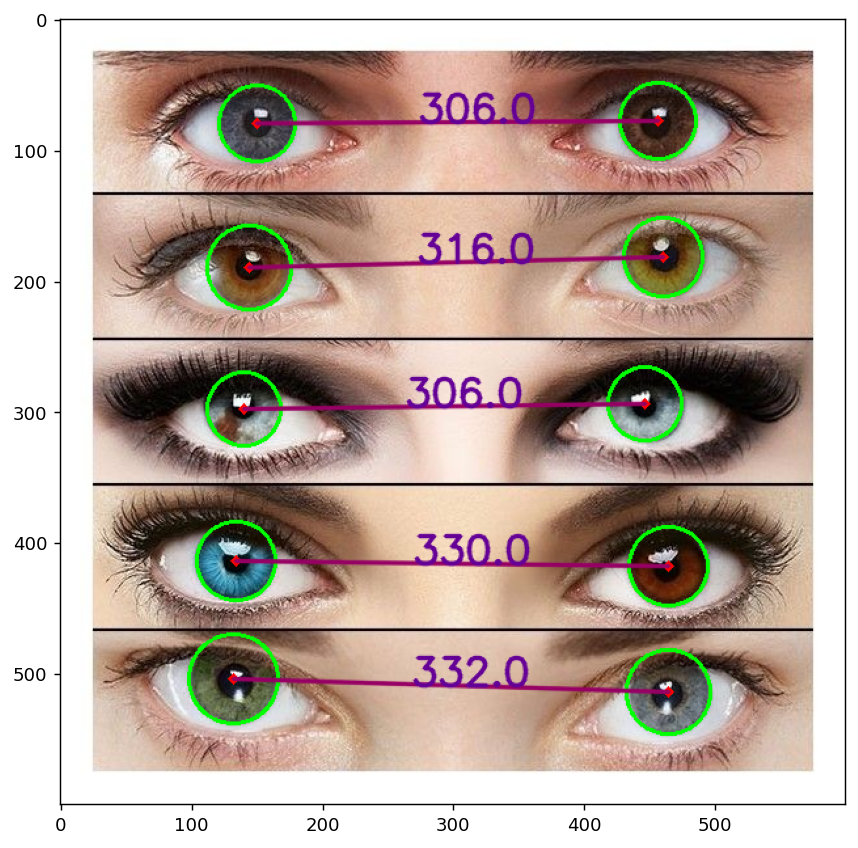

In [116]:
#Distancia entre centros
img_bis2 = img_bis.copy()
order = np.argsort(circles[0, :, 1])
s_circles = circles[0, order]

for i in range(int(order.size/2)):
    eye1 = s_circles[i*2]
    eye2 = s_circles[i*2+1]
    dist = abs(float(eye2[0]) - float(eye1[0]))
    x_c = int((eye2[0] + eye1[0])/2) - 30
    y_c = int((eye2[1] + eye1[1])/2)
    
    cv.line(img_bis2,tuple(eye1[:2]),tuple(eye2[:2]),(150,0,100),2,cv.LINE_AA)
    cv.putText(img_bis2,str(dist),(x_c,y_c),cv.FONT_HERSHEY_SIMPLEX,1,(100,0,150),2,cv.LINE_AA)

plot_fig([img_bis2])

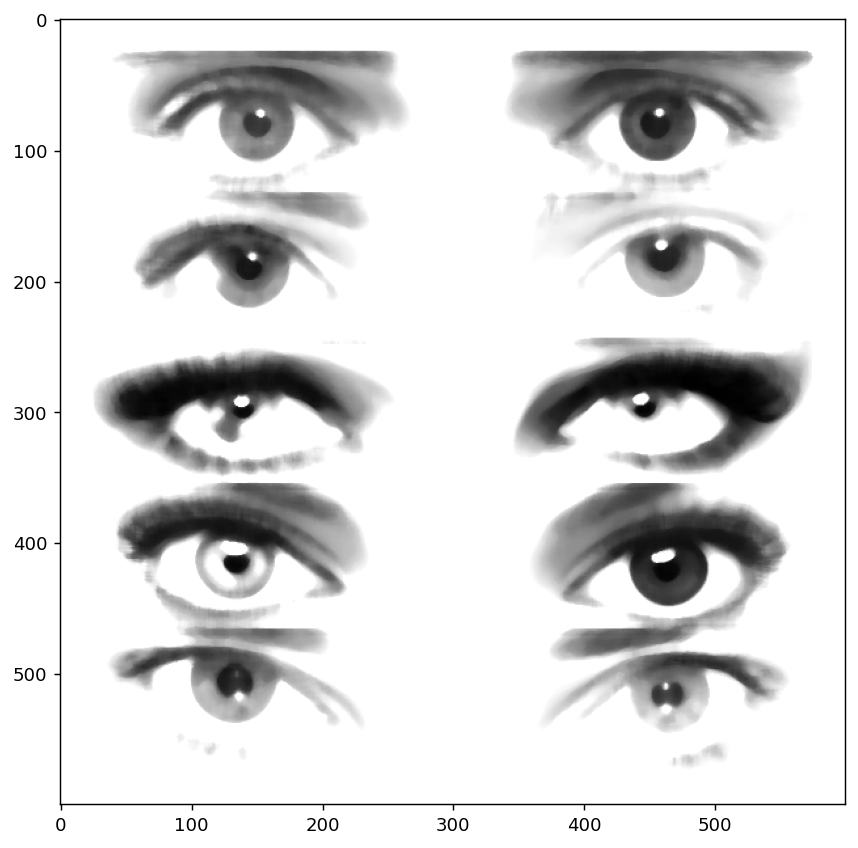

In [207]:
#Binarizado de imagen
ret,img_binary = cv.threshold(blur_gray,140,255,cv.THRESH_TRUNC)

plot_fig([img_binary])

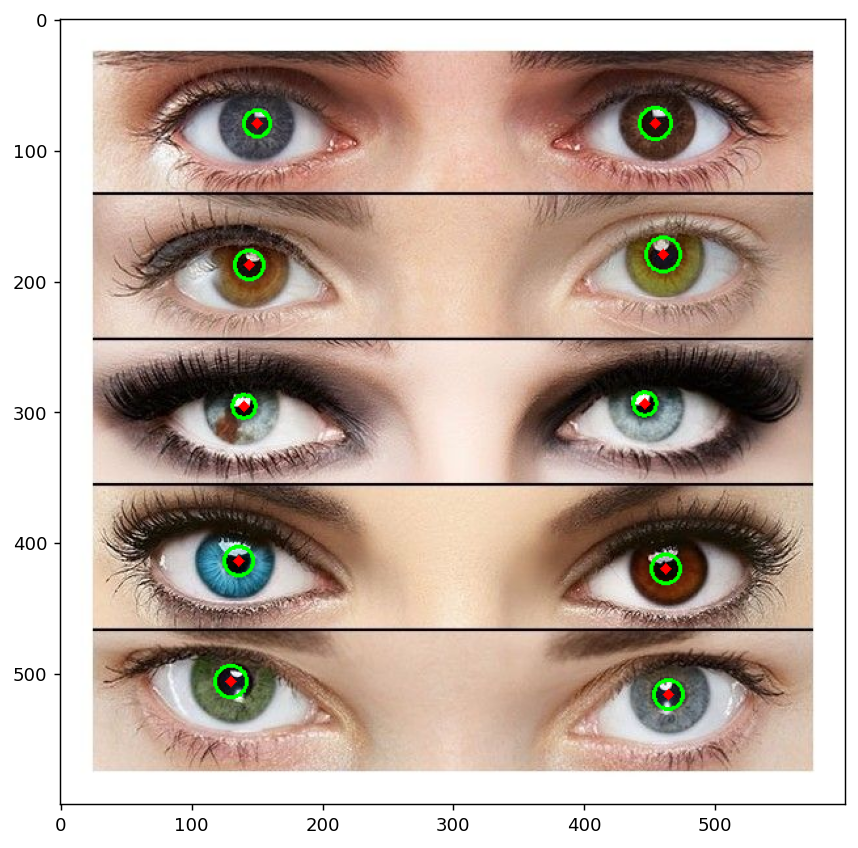

In [218]:
#Obtenemos circulos por medio de Hough
img2_bis = img.copy()
circles = cv.HoughCircles(img_binary,cv.HOUGH_GRADIENT,1,minDist=30,param1=78, param2=16, minRadius=5,maxRadius=15)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv.circle(img2_bis,(i[0],i[1]),i[2],(0,255,0),2) #Circulo externo
    cv.circle(img2_bis,(i[0],i[1]),2,(255,0,0),3)#Centro
    
plot_fig([img2_bis])

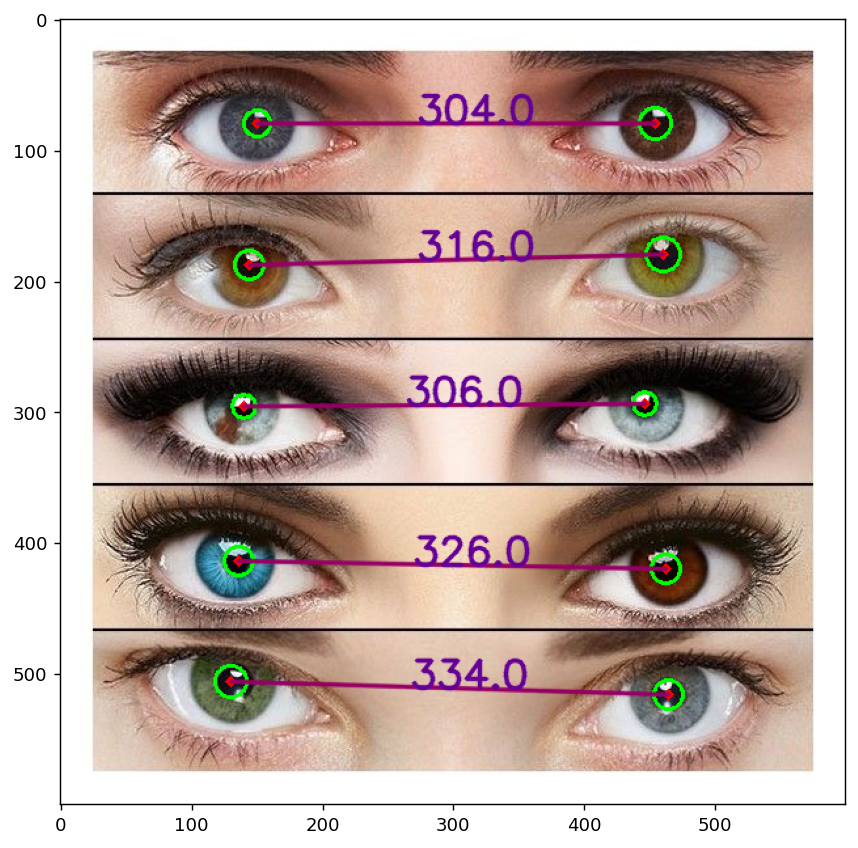

In [219]:
#Distancia entre centros
img2_bis2 = img2_bis.copy()
order = np.argsort(circles[0, :, 1])
s_circles = circles[0, order]

for i in range(int(order.size/2)):
    eye1 = s_circles[i*2]
    eye2 = s_circles[i*2+1]
    dist = abs(float(eye2[0]) - float(eye1[0]))
    x_c = int((eye2[0] + eye1[0])/2) - 30
    y_c = int((eye2[1] + eye1[1])/2)
    
    cv.line(img2_bis2,tuple(eye1[:2]),tuple(eye2[:2]),(150,0,100),2,cv.LINE_AA)
    cv.putText(img2_bis2,str(dist),(x_c,y_c),cv.FONT_HERSHEY_SIMPLEX,1,(100,0,150),2,cv.LINE_AA)

plot_fig([img2_bis2])